In [46]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
plt.style.use("fivethirtyeight")
import datetime as dt
import yfinance as yf

In [47]:
company = 'SISE.IS'

# Bir başlangıç ​​tarihi ve Bitiş Tarihi tanımlayın
start = dt.datetime(2020,1,1)
end =  dt.datetime(2023,5,1)

# Hisse Senedi Fiyat Verilerini Oku
df = yf.download(company, start , end)

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-09,36.520000,36.520000,36.520000,36.520000,36.520000,0
2023-02-15,41.200001,42.700001,40.500000,42.700001,42.700001,26081928
2023-02-16,46.939999,46.959999,43.599998,45.259998,45.259998,91437491
2023-02-17,44.400002,45.820000,43.939999,44.900002,44.900002,48177337
2023-02-20,45.060001,48.560001,44.580002,47.500000,47.500000,114083556
2023-02-21,47.419998,49.740002,46.700001,46.700001,46.700001,96670800
2023-02-22,46.400002,47.099998,45.200001,45.619999,45.619999,63075567
2023-02-23,45.400002,46.119999,44.820000,45.759998,45.759998,43582133
2023-02-24,45.779999,46.580002,44.500000,44.500000,44.500000,47490140


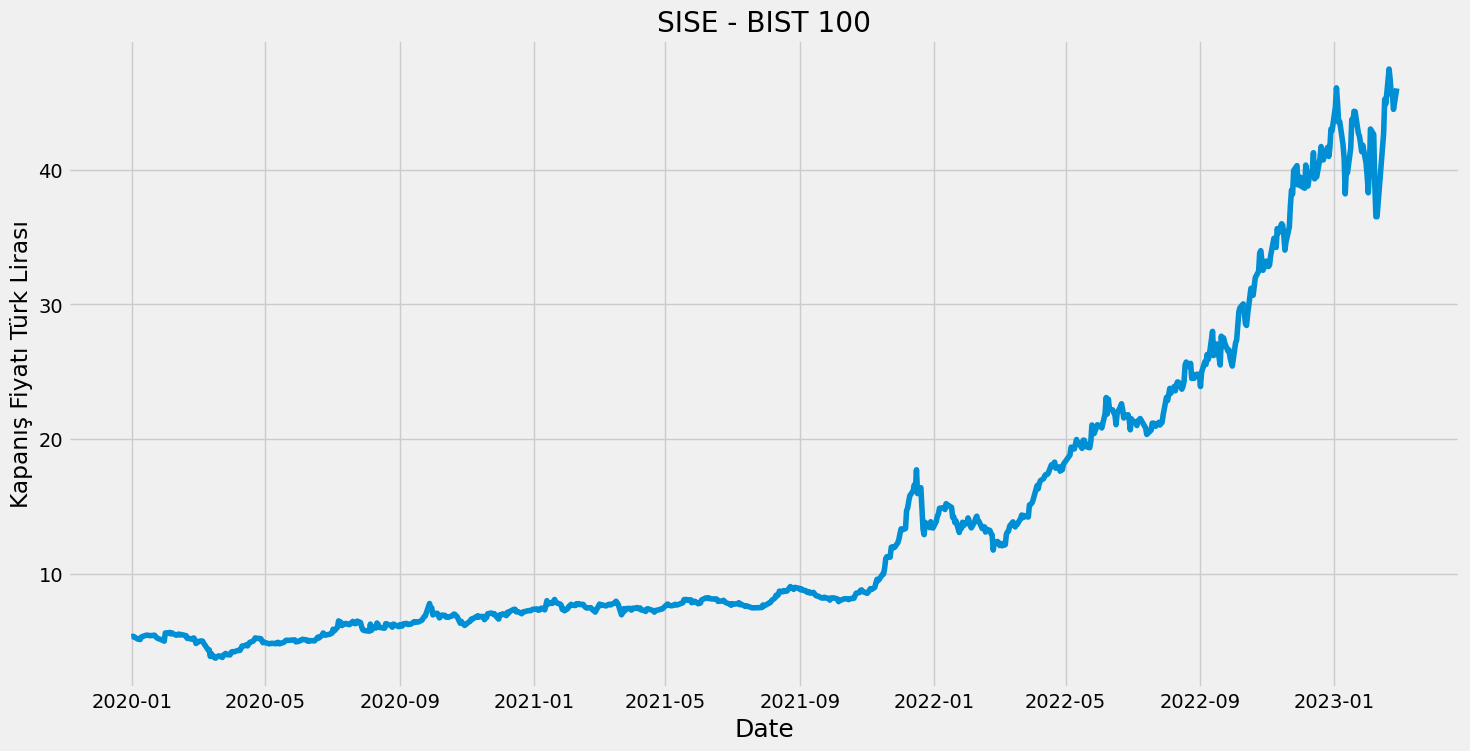

In [48]:
#Verileri filtrele
data = df.filter(["Close"])

#Görselleştirme
plt.figure(figsize=(16,8))
plt.plot(data["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası")
plt.title("SISE - BIST 100")
plt.show()

In [49]:
#Yalnızca Kapat sütunuyla yeni bir DataFrame oluştur
data = df.filter(["Close"])

#Veri çerçevesini bir numpy dizisine dönüştür
dataset = data.values

#Modeli eğitmek için satır sayısını al
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

634


In [50]:
#Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[3.65380202e-02],
       [3.69947451e-02],
       [3.56245705e-02],
       [3.21991288e-02],
       [3.21991288e-02],
       [3.15140469e-02],
       [3.56245705e-02],
       [3.65380202e-02],
       [3.85932875e-02],
       [3.90500123e-02],
       [3.88216445e-02],
       [3.85932875e-02],
       [3.81365626e-02],
       [3.85932875e-02],
       [3.90500123e-02],
       [3.72231129e-02],
       [3.49394778e-02],
       [3.35693033e-02],
       [3.15140469e-02],
       [3.06005973e-02],
       [3.01438724e-02],
       [2.87736870e-02],
       [4.27038111e-02],
       [4.29321789e-02],
       [4.36172608e-02],
       [4.11052796e-02],
       [4.29321789e-02],
       [4.15620044e-02],
       [3.88216445e-02],
       [3.99634620e-02],
       [4.08769117e-02],
       [3.92783693e-02],
       [4.01918190e-02],
       [3.90500123e-02],
       [3.81365626e-02],
       [3.81365626e-02],
       [3.35693033e-02],
       [3.37976712e-02],
       [3.21991288e-02],
       [3.35693033e-02],


In [51]:
#Eğitim veri setini oluştur
#Ölçeklendirilmiş eğitim veri setini oluştur

train_data = scaled_data[0:training_data_len,:]

#Verileri x_train ve y_train veri kümelerine ayırın
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.03653802, 0.03699475, 0.03562457, 0.03219913, 0.03219913,
       0.03151405, 0.03562457, 0.03653802, 0.03859329, 0.03905001,
       0.03882164, 0.03859329, 0.03813656, 0.03859329, 0.03905001,
       0.03722311, 0.03493948, 0.0335693 , 0.03151405, 0.0306006 ,
       0.03014387, 0.02877369, 0.04270381, 0.04293218, 0.04361726,
       0.04110528, 0.04293218, 0.041562  , 0.03882164, 0.03996346,
       0.04087691, 0.03927837, 0.04019182, 0.03905001, 0.03813656,
       0.03813656, 0.0335693 , 0.03379767, 0.03219913, 0.0335693 ,
       0.0342544 , 0.03105732, 0.02489153, 0.02854533, 0.02900205,
       0.02923041, 0.02877369, 0.02534826, 0.01689883, 0.01415848,
       0.01415848, 0.00296871, 0.00753597, 0.00045672, 0.        ,
       0.00205526, 0.00319707, 0.00388217, 0.00114181, 0.00525234])]
[0.006394153268638694]



In [52]:
#x_train ve y_train'i numpy dizilerine dönüştür
x_train,y_train = np.array(x_train),np.array(y_train)

In [53]:
#Verileri yeniden şekillendir
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(574, 60, 1)

In [54]:
#LSTM Modelini Oluşturun
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [55]:
#Modeli derle
model.compile(optimizer="adam",loss="mean_squared_error")

In [56]:
#Modeli eğit
model.fit(x_train,y_train,batch_size=1, epochs=1)

574/574 [==============================] - 9s 11ms/step - loss: 7.9288e-04


In [57]:
#Test veri setini oluştur
#1543'ten 2003'e ölçeklenmiş değerler içeren yeni bir dizi oluştur

test_data = scaled_data[training_data_len - 60:, :]

#x_test ve y_test veri kümelerini oluştur

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [58]:
#Verileri bir numpy dizisine dönüştür
x_test = np.array(x_test)

In [59]:
#Verileri yeniden şekillendir
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [60]:
#Modellerin tahmin edilen fiyat değerlerini alın
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 10ms/step


In [61]:
#Kök ortalama kare hatasını al (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

3.148988651323922

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_15756\235822795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


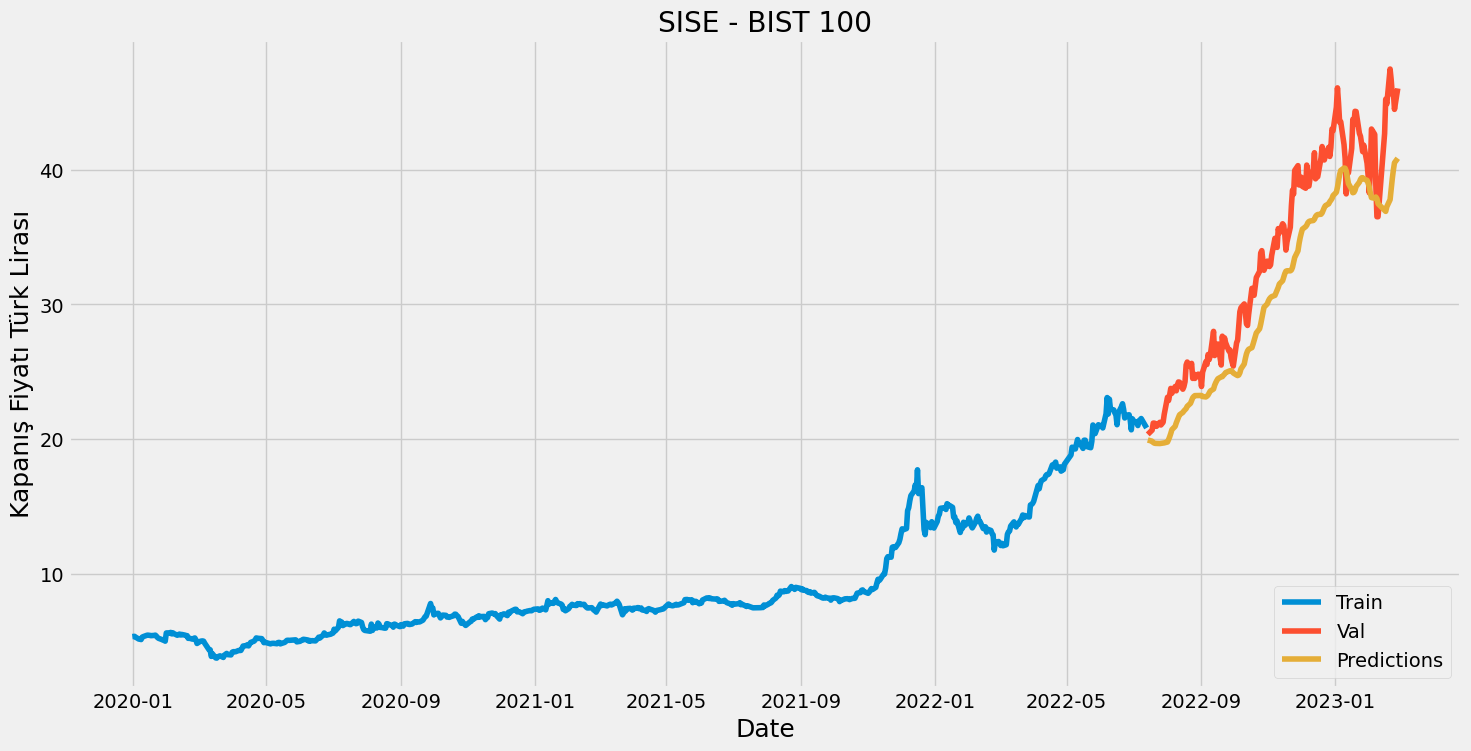

In [62]:
#Verileri çiz
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Verileri görselleştirin
plt.figure(figsize=(16,8))
plt.title("SISE - BIST 100")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"], loc="lower right")
plt.show()